# Probs del dado

In [1]:
def par(x):
    return x%2==0

In [4]:
sample_space=[1,2,3,4,5,6]

caras=len(sample_space)

pares=len([e for e in sample_space if par(e)])

pares_prob=pares/caras

pares_prob

0.5

# Distribuciones Discretas

### binomial

In [5]:
# https://ast.wikipedia.org/wiki/Distribuci%C3%B3n_bin%C3%B3mica

from scipy.stats import binom
import matplotlib.pyplot as plt

# binom.pmf(k, n, p)   # k=nº de exitos, n=nº de repeticiones, p=probabilidad del evento

binom.pmf(3, 10, 0.5)  # ¿Cual es la prob de que salgan tres soles si tiro 10 veces la moneda?

0.11718750000000014

In [6]:
binom.pmf(5, 20, 1/6)  # ¿Cual es la prob de que salgan 5 doses si tiro 20 veces el dado?

0.1294102919789899

0.9999990463256827

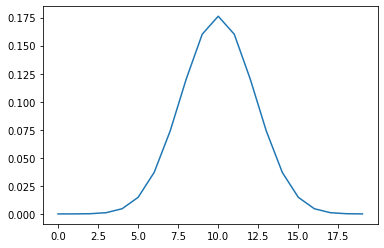

In [14]:
x=[i for i in range(20)]  # numero de exitos
y=[binom.pmf(x, 20, 0.5) for x in x] # su probabilidad

plt.plot(x, y);
sum(y)

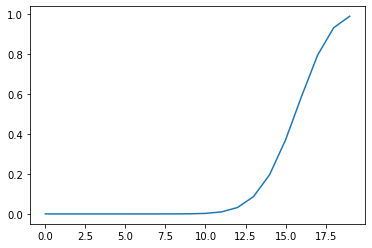

In [13]:
x=[i for i in range(20)]  # numero de exitos
y=[binom.cdf(x, 20, 0.8) for x in x] # su probabilidad

plt.plot(x, y);

In [15]:
# https://es.wikipedia.org/wiki/Momento_central

n=10
p=0.3


media, var, sime, kurt = binom.stats(n, p, moments='mvsk')

In [19]:
kurt

array(-0.12380952)

### binomial negativa

In [ ]:
# https://es.wikipedia.org/wiki/Distribuci%C3%B3n_binomial_negativa

In [ ]:
# ¿Que prob hay de que la decima tirada corresponda con la tercera cara que sale?

In [20]:
from scipy.stats import nbinom

In [21]:
nbinom.pmf(3, 10, 0.5)

0.026855468749999993

In [22]:
nbinom.cdf(3, 10, 0.5)

0.046142578125000014

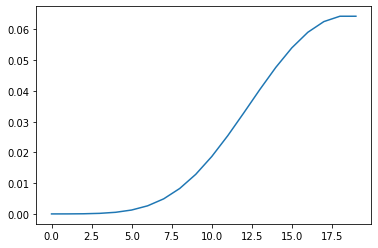

In [25]:
x=[i for i in range(20)]  
y=[nbinom.pmf(x, 20, 0.5) for x in x] 

plt.plot(x, y);

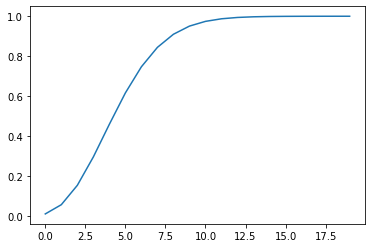

In [26]:
x=[i for i in range(20)]  
y=[nbinom.cdf(x, 20, 0.8) for x in x] 

plt.plot(x, y);

### geometrica

In [27]:
# https://es.wikipedia.org/wiki/Distribuci%C3%B3n_geom%C3%A9trica

In [28]:
# ¿Cual es la prob de exito en el k-esimo intento?

In [29]:
from scipy.stats import geom

In [30]:
# geom.pmf(k, p)

geom.pmf(5, 0.5)

0.03125

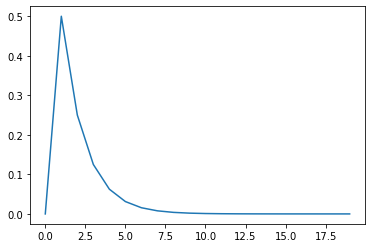

In [31]:
x=[i for i in range(20)]  
y=[geom.pmf(x, 0.5) for x in x] 

plt.plot(x, y);

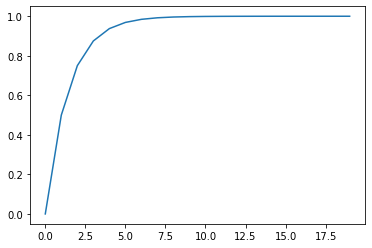

In [32]:
x=[i for i in range(20)]  
y=[geom.cdf(x, 0.5) for x in x] 

plt.plot(x, y);

### uniforme discreta

In [33]:
# https://es.wikipedia.org/wiki/Distribuci%C3%B3n_uniforme_discreta

In [35]:
from scipy.stats import randint

randint.pmf([0, 6, 7, 8, 10], 0, 8)   # (elementos, intervalo)

array([0.125, 0.125, 0.125, 0.   , 0.   ])

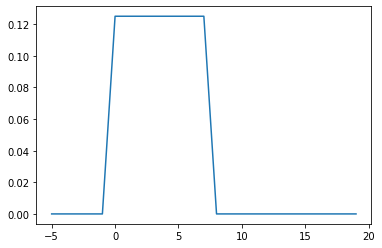

In [37]:
x=[i for i in range(-5, 20)]  
y=[randint.pmf(x, 0, 8) for x in x] 

plt.plot(x, y);

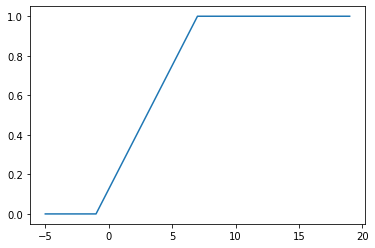

In [39]:
x=[i for i in range(-5, 20)]  
y=[randint.cdf(x, 0, 8) for x in x] 

plt.plot(x, y);

### Poisson (ley de sucesos raros)

In [40]:
# https://ast.wikipedia.org/wiki/Distribuci%C3%B3n_de_Poisson

In [41]:
from scipy.stats import poisson

In [42]:
# poisson(x, lambda)   , poisson(evento, media)

In [44]:
poisson.pmf(2, 1.4)

0.24166502466277437

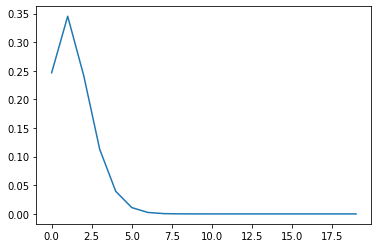

In [46]:
x=[i for i in range(20)]  
y=[poisson.pmf(x, 1.4) for x in x] 

plt.plot(x, y);

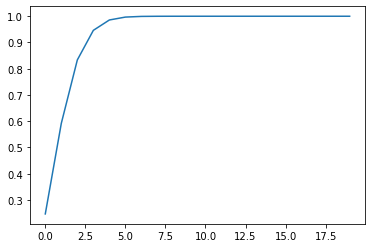

In [47]:
x=[i for i in range(20)]  
y=[poisson.cdf(x, 1.4) for x in x] 

plt.plot(x, y);

### futbol

In [49]:
import numpy as np
import seaborn as sns

In [50]:
equipo_A=2.1  # medias de goles de dos equipos
equipo_B=1.4

In [56]:
A=[poisson.pmf(i, equipo_A) for i in range(5)] 
B=[poisson.pmf(i, equipo_B) for i in range(5)] 

In [57]:
A

[0.1224564282529819,
 0.257158499331262,
 0.2700164242978251,
 0.18901149700847755,
 0.09923103592945072]

In [58]:
B

[0.2465969639416065,
 0.3452357495182491,
 0.24166502466277437,
 0.11277701150929471,
 0.039471954028253146]

In [59]:
M=np.outer(A, B)

In [60]:
M

array([[0.03019738, 0.04227634, 0.02959344, 0.01381027, 0.00483359],
       [0.06341451, 0.08878031, 0.06214622, 0.02900157, 0.01015055],
       [0.06658523, 0.09321932, 0.06525353, 0.03045165, 0.01065808],
       [0.04660966, 0.06525353, 0.04567747, 0.02131615, 0.00746065],
       [0.02447007, 0.0342581 , 0.02398067, 0.01119098, 0.00391684]])

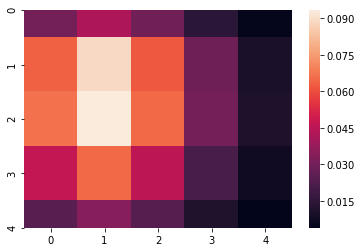

In [61]:
sns.heatmap(M)

In [62]:
uno=np.sum(np.tril(M, -1))

empate=np.sum(np.diag(M))

dos=np.sum(np.triu(M, 1))

In [63]:
print (uno, empate, dos)

0.4746595371733741 0.20946421118312025 0.2403823420537832


In [64]:
uno+empate+dos

0.9245060904102775